practice - 팁 데이터셋

In [3]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [9]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [10]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


X와 y로 구별

In [11]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

슝=3


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


파라미터 만들고, 미분을 통해 값 조정하기

In [14]:
import numpy as np
W = np.random.rand(12)
b = np.random.rand()
W, b

(array([0.69038414, 0.45187975, 0.77429181, 0.9687764 , 0.51121427,
        0.88727924, 0.38801166, 0.46341466, 0.67871385, 0.95655255,
        0.50781351, 0.41189183]),
 0.49012454268508243)

In [17]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [18]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [21]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [22]:
## 테스트
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [691.10716478  83.76144059  20.04013623   9.9873742   11.69163004
  18.3358804    6.9051257    2.01140535  10.96780224  10.14317715
   7.38129305  22.64621739]
db: 30.027510431220435


In [24]:
# 경사하강법
LEARNING_RATE = 0.0001

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 34.5893
Iteration 20 : Loss 6.3168
Iteration 30 : Loss 2.7908
Iteration 40 : Loss 2.3480
Iteration 50 : Loss 2.2894
Iteration 60 : Loss 2.2786
Iteration 70 : Loss 2.2738
Iteration 80 : Loss 2.2698
Iteration 90 : Loss 2.2659
Iteration 100 : Loss 2.2620
Iteration 110 : Loss 2.2582
Iteration 120 : Loss 2.2543
Iteration 130 : Loss 2.2505
Iteration 140 : Loss 2.2467
Iteration 150 : Loss 2.2429
Iteration 160 : Loss 2.2391
Iteration 170 : Loss 2.2353
Iteration 180 : Loss 2.2316
Iteration 190 : Loss 2.2278
Iteration 200 : Loss 2.2241
Iteration 210 : Loss 2.2204
Iteration 220 : Loss 2.2167
Iteration 230 : Loss 2.2131
Iteration 240 : Loss 2.2094
Iteration 250 : Loss 2.2058
Iteration 260 : Loss 2.2021
Iteration 270 : Loss 2.1985
Iteration 280 : Loss 2.1949
Iteration 290 : Loss 2.1913
Iteration 300 : Loss 2.1878
Iteration 310 : Loss 2.1842
Iteration 320 : Loss 2.1807
Iteration 330 : Loss 2.1772
Iteration 340 : Loss 2.1736
Iteration 350 : Loss 2.1702
Iteration 360 : Loss 2.1667


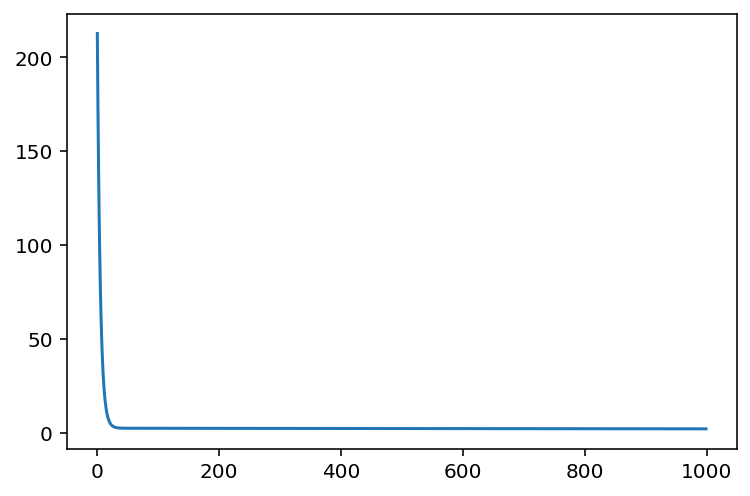

(array([-0.00380074,  0.25070552,  0.72320407,  0.91267704,  0.48931467,
         0.80199172,  0.35685149,  0.45600013,  0.64745719,  0.9191968 ,
         0.47064772,  0.3418705 ]),
 0.3829374305025133)

In [26]:
# Loss 그래프
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

# 낮은 Loss를 가진 그래프의 파라미터 값
W, b 

In [27]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

1.8210864964206404

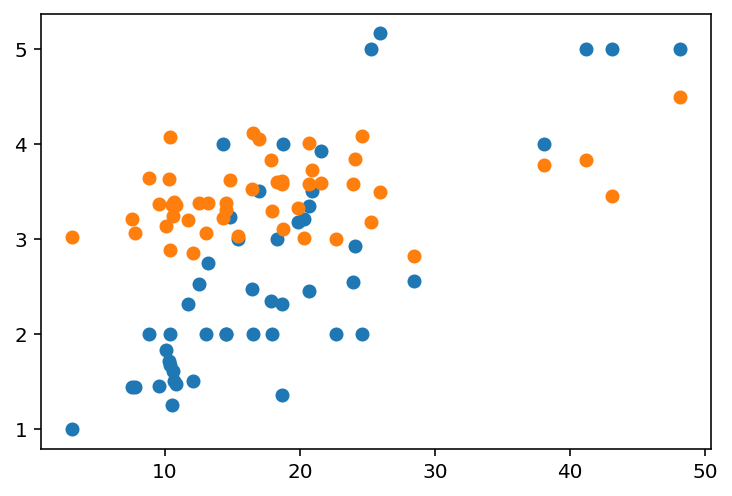

In [28]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

#꽤 잘 맞추는 듯 하다.

사이킷런으로 깔끔하게!

In [29]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

In [30]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)